<a href="https://colab.research.google.com/github/nzywalewskisju/Portfolio_Projects/blob/main/MLR_Model_Python/Predicting_Phillies_Wins_using_MLR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- The goal of this project is to predict the Phillies win total in a given season using a variety of predictor variables.
- The dataset was obtained from baseballreference.com.
- Only the most recent data (last 20 seasons) was used.

In [ ]:
## Loading required libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time as timeit
from numpy.random import seed

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.compat import lzip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Phillies_Project/phillies.csv')
print('Shape of df:', df.shape)
df.info()

Shape of df: (141, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    141 non-null    int64  
 1   Lg      141 non-null    object 
 2   W       141 non-null    int64  
 3   L       141 non-null    int64  
 4   Finish  141 non-null    int64  
 5   R/G     141 non-null    float64
 6   G       141 non-null    int64  
 7   PA      141 non-null    int64  
 8   AB      141 non-null    int64  
 9   R       141 non-null    int64  
 10  H       141 non-null    int64  
 11  2B      141 non-null    int64  
 12  3B      141 non-null    int64  
 13  HR      141 non-null    int64  
 14  RBI     141 non-null    int64  
 15  SB      138 non-null    float64
 16  CS      106 non-null    float64
 17  BB      141 non-null    int64  
 18  SO      141 non-null    int64  
 19  BA      141 non-null    float64
 20  OBP     141 non-null    float64
 21  SLG     141 non-

In [ ]:
#Data Cleaning
print('Total duplicates:', df.duplicated().sum())
print('Total missing values:', df.isnull().sum().sum())
df = df.iloc[0:21,:]      # only using the last 20 seasons of data
df = df.drop(3)           # dropping the year 2020 from the data set because of the shortened season
df = df.dropna()
df

Total duplicates: 0
Total missing values: 38


,Year,Lg,W,L,Finish,R/G,G,PA,AB,R,...,BB,SO,BA,OBP,SLG,OPS,E,DP,Fld%,BatAge
0,2023,NL East,90,72,2,4.91,162,6207,5541,796,...,539,1481,0.256,0.327,0.438,0.765,91,117,0.984,28.4
1,2022,NL East,87,75,3,4.61,162,6077,5496,747,...,478,1363,0.253,0.317,0.422,0.739,69,129,0.988,28.2
2,2021,NL East,82,80,2,4.53,162,6089,5366,734,...,564,1402,0.240,0.318,0.408,0.726,94,142,0.984,29.1
4,2019,NL East,81,81,4,4.78,162,6261,5571,774,...,562,1453,0.246,0.319,0.427,0.746,97,136,0.984,27.6
5,2018,NL East,80,82,3,4.18,162,6136,5424,677,...,582,1520,0.234,0.314,0.393,0.707,123,138,0.979,26.7
6,2017,NL East,66,96,5,4.26,162,6133,5535,690,...,494,1417,0.250,0.315,0.409,0.723,82,145,0.986,26.6
7,2016,NL East,71,91,4,3.77,162,5992,5434,610,...,424,1376,0.240,0.301,0.384,0.685,97,142,0.984,26.9
8,2015,NL East,63,99,5,3.86,162,6053,5529,626,...,387,1274,0.249,0.303,0.382,0.684,117,145,0.981,28.0
9,2014,NL East,73,89,5,3.82,162,6198,5603,619,...,443,1306,0.242,0.302,0.363,0.665,83,133,0.987,30.8
10,2013,NL East,73,89,4,3.77,162,6014,5456,610,...,417,1205,0.248,0.306,0.384,0.690,97,141,0.984,30.0


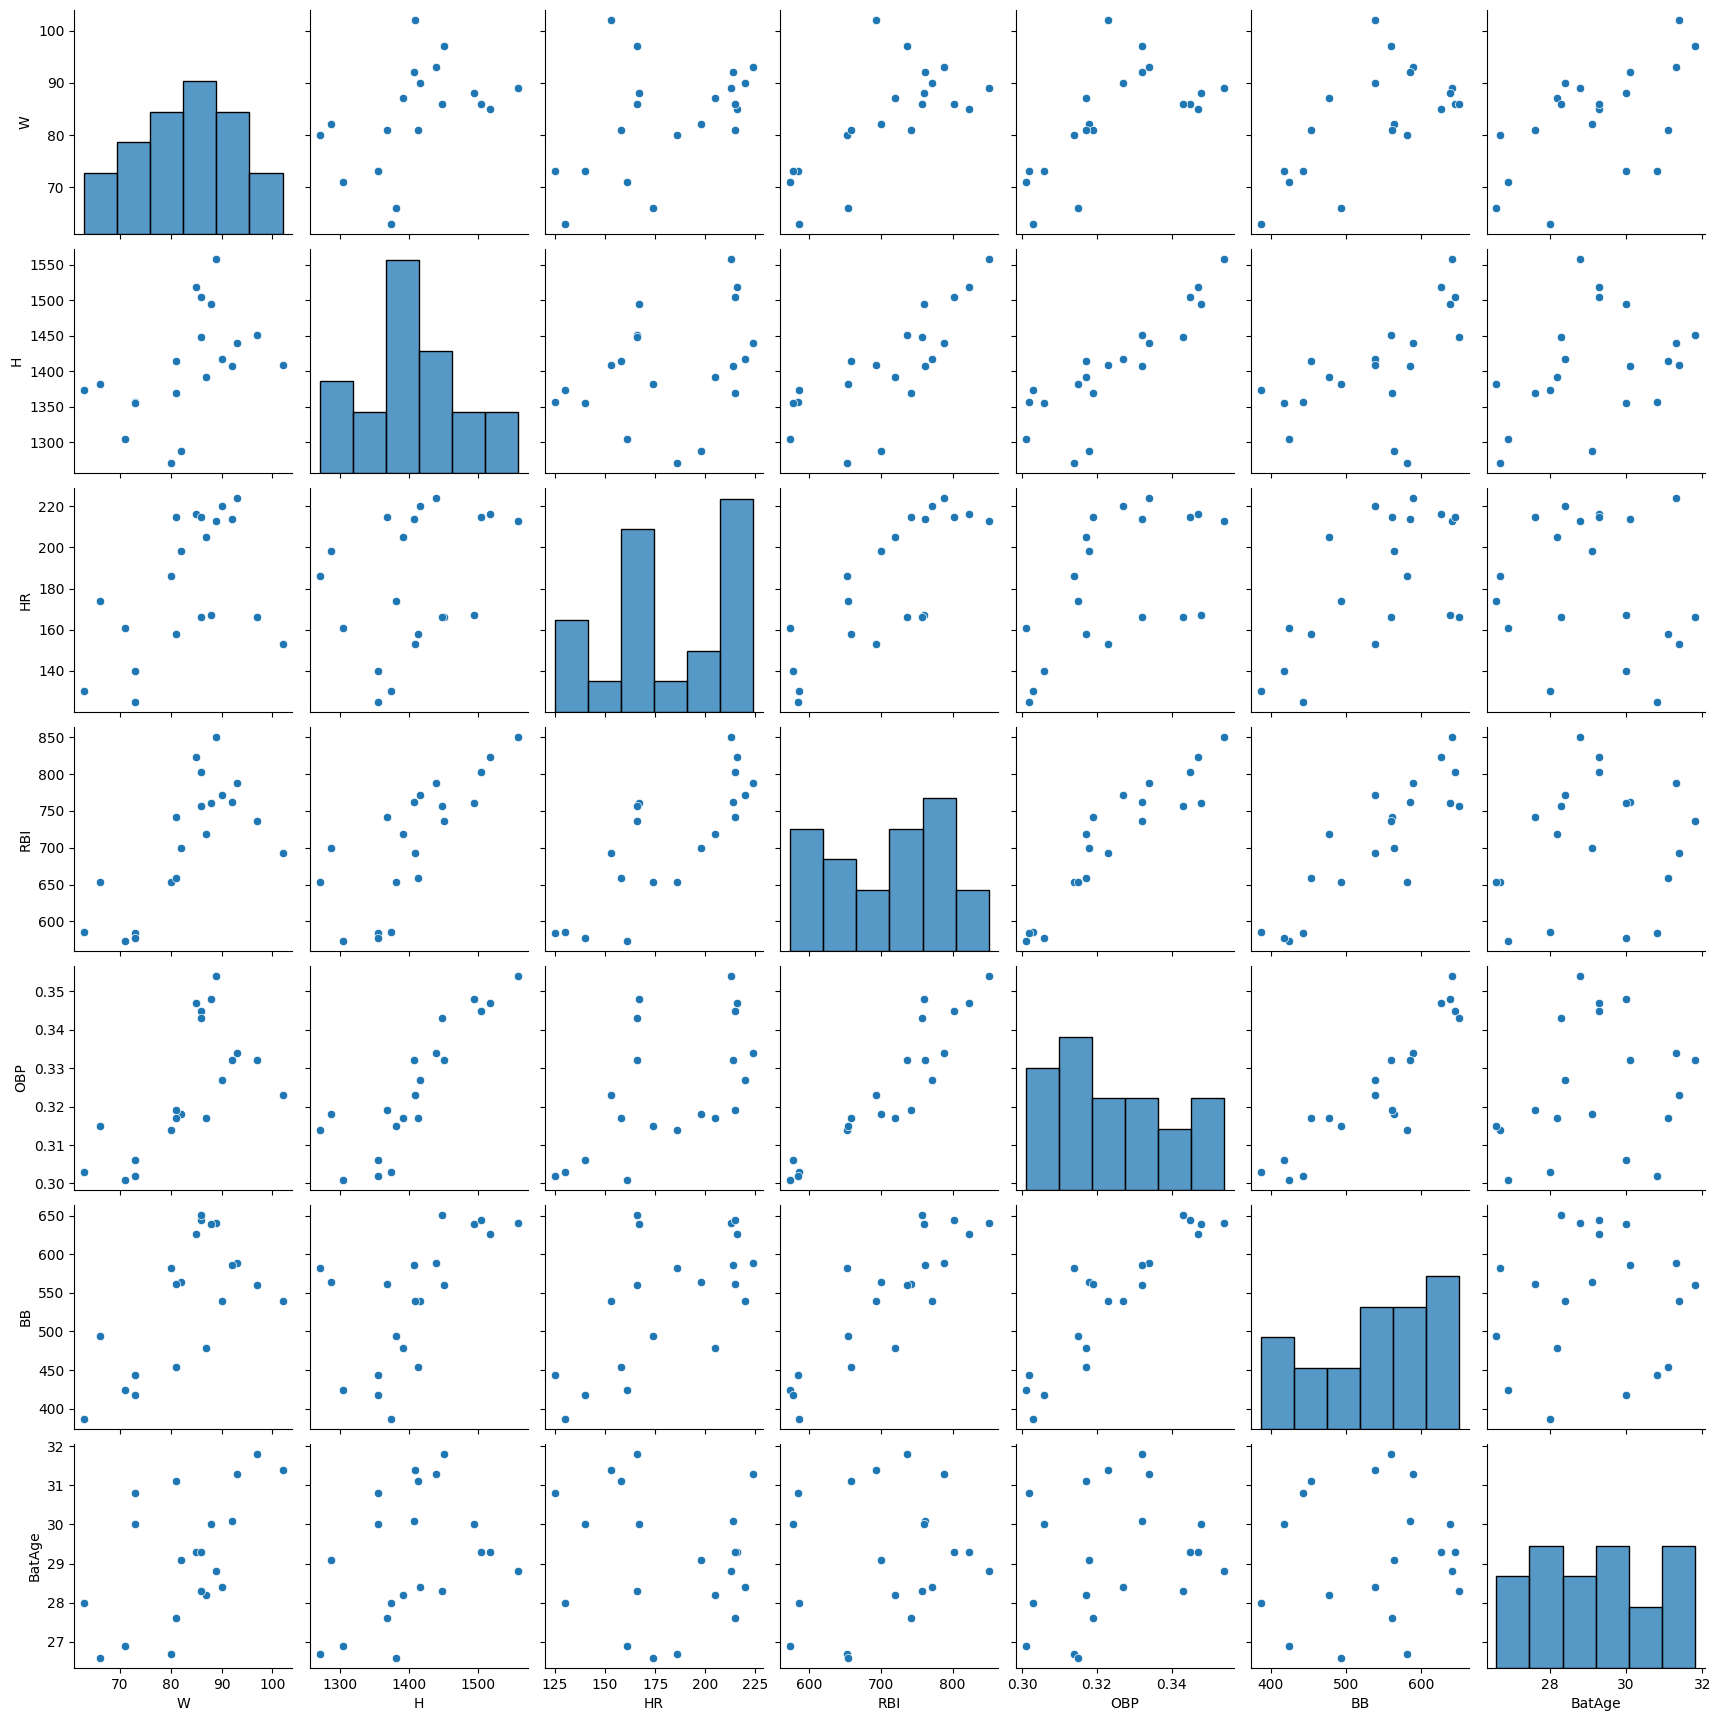

In [ ]:
#Exploratory Analysis
sns.pairplot(df[['W', 'H', 'HR', 'RBI', 'OBP', 'BB', 'BatAge']])  #performed EDA on all variables, but these are the most intriguing in my opinion
plt.show()

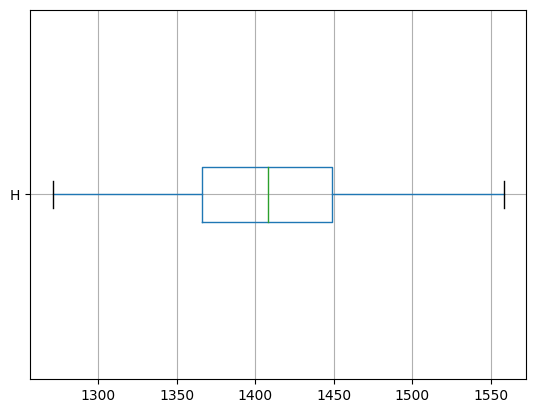

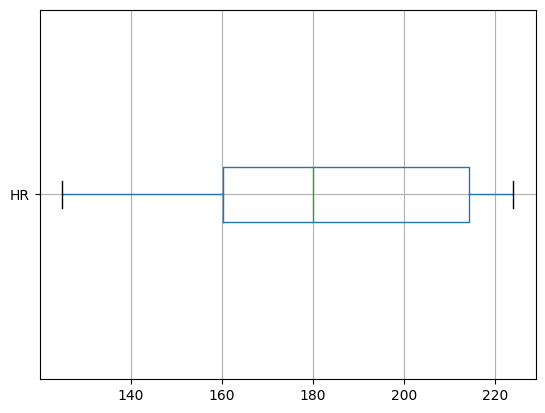

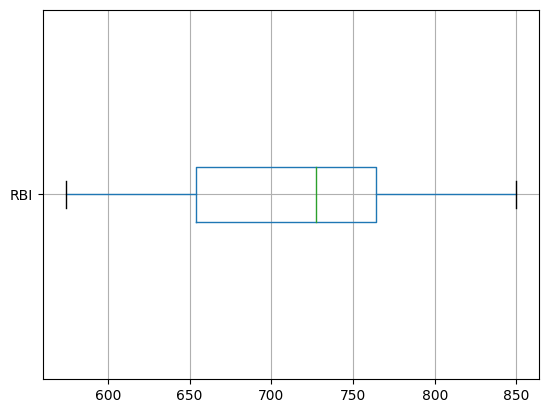

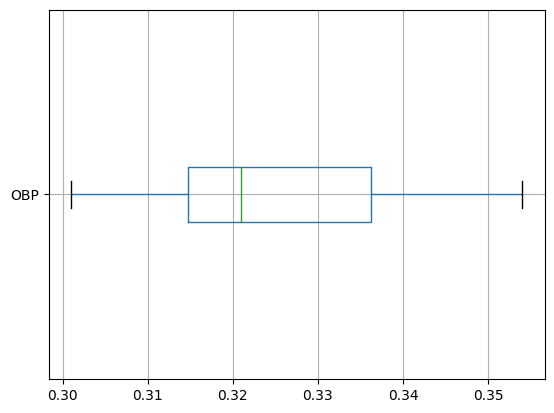

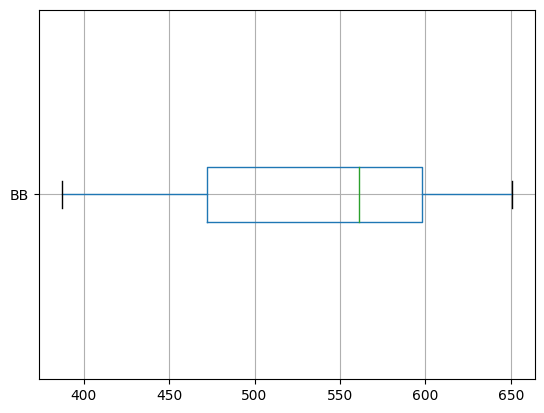

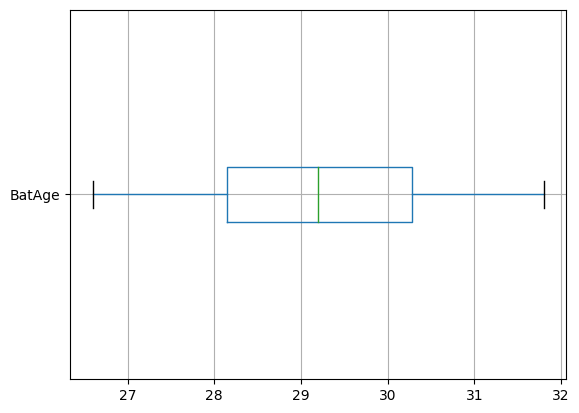

In [ ]:
#Exploratory Analysis-- displaying boxplots for each of the 6 predictor variables listed
df.boxplot('H', vert=False)
plt.show()
df.boxplot('HR', vert=False)
plt.show()
df.boxplot('RBI', vert=False)
plt.show()
df.boxplot('OBP', vert=False)
plt.show()
df.boxplot('BB', vert=False)
plt.show()
df.boxplot('BatAge', vert=False)
plt.show()


In [ ]:
# Separate Response (Wins) from Predictors

X = df[['H', 'RBI', 'BatAge']]     # generated a model using all 6 variables, but dropped them one by one of they were not significant (p-score > .05)
Y = df[['W']]    # Wins is the response variable, trying to predict number of wins

In [ ]:
# Estimate MLR params

X = sm.add_constant(X)               # Adding intercept col to X
model = sm.OLS(Y,X).fit()            # Fitting regression model
model.summary()                      # GoF measures and summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     18.17
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           2.10e-05
Time:                        23:04:25   Log-Likelihood:                -59.274
No. Observations:                  20   AIC:                             126.5
Df Residuals:                      16   BIC:                             130.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.1773     28.128     -0.575      0.573     -75.807      43.452
H             -0.0607      0.026     -2.303      0.035      -0.117      -0.005
RBI            0.1131      0.022      5.066      0.000       0.066       0.160
BatAge         3.5864      0.812      4.416      0.000       1.865       5.308
==============================================================================
Omnibus:                        4.152   Durbin-Watson:                   2.190
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                2.363
Skew:                           0.810   Prob(JB):                        0.307
Kurtosis:                       3.461   Cond. No.                     3.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

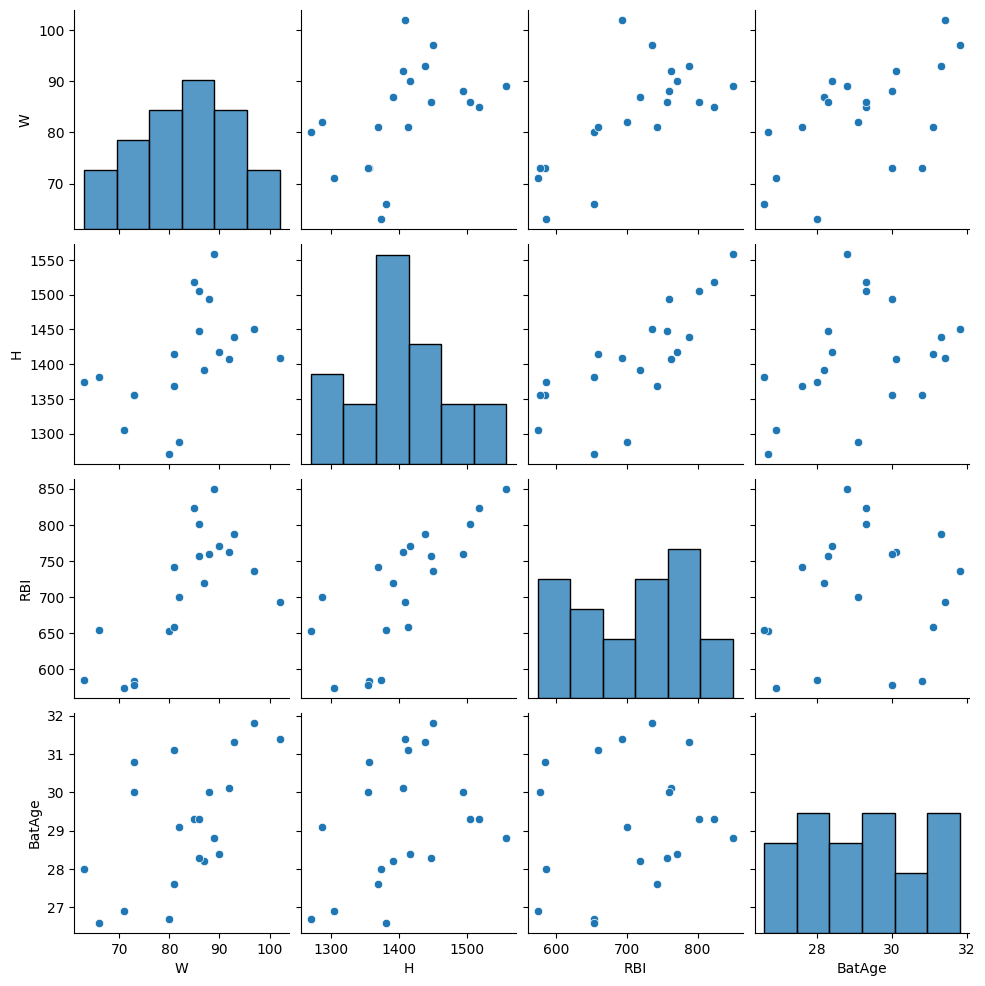

In [ ]:
# Linearity-- checking assumptions of a MLR model (1/4)

sns.pairplot(df[['W', 'H', 'RBI', 'BatAge']])
plt.show()

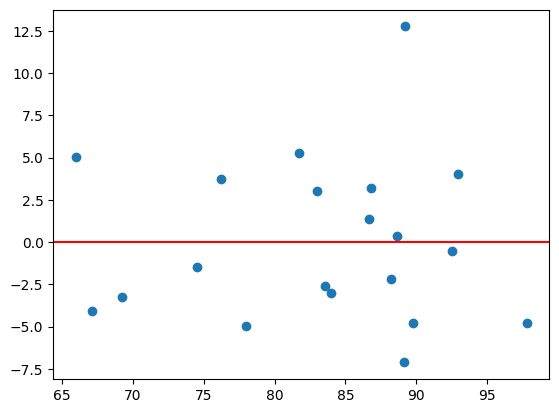

In [ ]:
# Model residuals-- checking assumptions of a MLR model (2/4)-- looking for good scatter

e = model.resid            # residuals
yhat = model.fittedvalues  # Fitted values inline calc
plt.scatter(yhat, e)
plt.axhline(y=0, color='r', linestyle='-')


In [ ]:
# Constant Variance-- checking assumptions of a MLR model (3/4)

name = ['Breusch-Pagan statistic', 'p-value', 'f-value', 'f p-value']
test = sm.stats.het_breuschpagan(model.resid, model.model.exog)
print(lzip(name, test))

name = ['White test statistic', 'p-value', 'f-value', 'f p-value']
test = sm.stats.het_white(model.resid, model.model.exog)
print(lzip(name, test))

# p-values are above 0.05, so we are in good shape

[('Breusch-Pagan statistic', 3.433415487299667), ('p-value', 0.3295011401668947), ('f-value', 1.1053303866925712), ('f p-value', 0.37589139945594424)]
[('White test statistic', 8.038390563720366), ('p-value', 0.5302820529538732), ('f-value', 0.7466842249263693), ('f p-value', 0.6643921168500324)]


<Axes: ylabel='Count'>

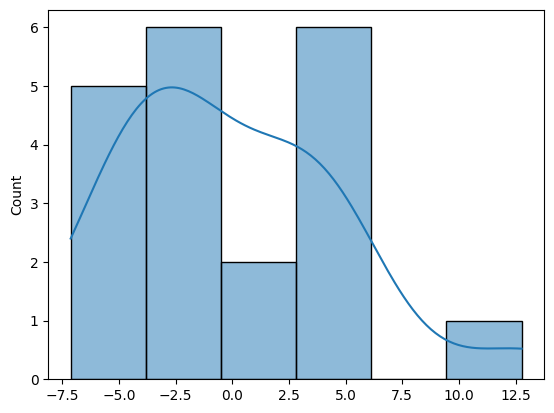

In [ ]:
# Normality-- checking assumptions of a MLR model (4/4)

sns.histplot(model.resid, kde=True)

# not exactly normally distributed, but proceed with reservations

In [ ]:
# Predictions
pred = model.params[0] + (model.params[1] * 1500)+ (model.params[2] * 700)+ (model.params[3] * 32)
# can plug in any numbers (within reason) to predict the amount of wins
print("Number of wins predicted: ", pred)

Number of wins predicted:  86.65349872172595


This model was developed in December of 2023 in collaboration with Trevor Lacoste and Anthony Magro, both of whom were my classmates at Saint Joseph's University.